In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
print('Data imported successfully')
df

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
#checking number of rows and columns
df.shape

(9994, 13)

In [4]:
#column names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

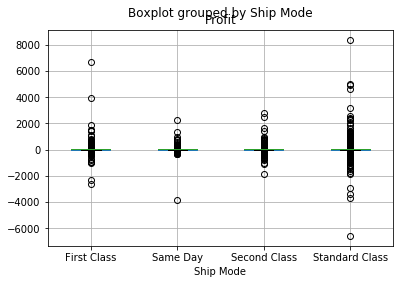

In [8]:
df.boxplot(column='Profit',by='Ship Mode')

here we can see that the averages of each group is same and have no significance diiference, and we need to check statistaclly to reject or accept the ship mode

In [9]:
SM=df.groupby(by='Ship Mode')
SM_1=SM.get_group('Standard Class')
SM_2=SM.get_group('Second Class')
SM_3=SM.get_group('First Class')
SM_4=SM.get_group('Same Day')


In [10]:
from scipy.stats import f_oneway,ttest_ind

In [11]:
f_oneway(SM_1['Profit'],SM_2['Profit'],SM_3['Profit'],SM_4['Profit'])

F_onewayResult(statistic=0.15391615919389462, pvalue=0.9272083739374918)

from above p_value >0.05 i.e,0.9272083739374918 , so their is no significance difference between groups so we failed to reject null hypothesis. 

In [12]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

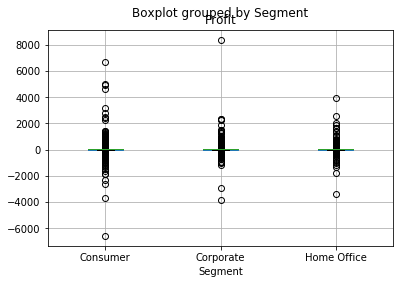

In [13]:
df.boxplot(column='Profit',by='Segment')

from the above boxplot all groups are having same average.

In [14]:
Sg=df.groupby(by='Segment')
Sg_1=Sg.get_group('Consumer')
Sg_2=Sg.get_group('Corporate')
Sg_3=Sg.get_group('Home Office')


In [15]:
f_oneway(Sg_1['Profit'],Sg_2['Profit'],Sg_3['Profit'])

F_onewayResult(statistic=0.8980668323003197, pvalue=0.4073892685202365)

here p_value is > 0.05, hence segment groups as no significance difference so, we failed to reject null hypothesis

In [16]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

here we cannot get any information about profit

In [17]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
San Mateo          1
Jupiter            1
Manhattan          1
Saint Peters       1
Kissimmee          1
Name: City, Length: 531, dtype: int64

In [18]:
df['City'].nunique()

531

In [19]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [20]:
from scipy.stats import levene

In [21]:
levene(df['Postal Code'],df['Profit'])

LeveneResult(statistic=46244.42910928126, pvalue=0.0)

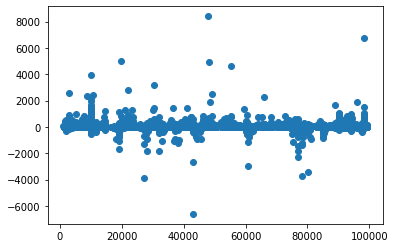

In [22]:
plt.scatter(df['Postal Code'],df['Profit'])

In [23]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

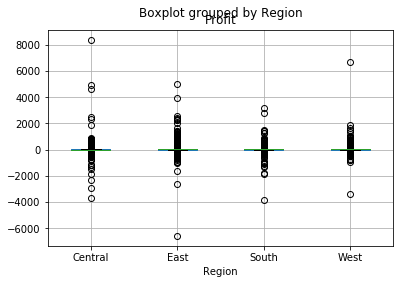

In [24]:
df.boxplot(column='Profit',by='Region')

In [25]:
Rg=df.groupby(by='Region')
Rg_1=Rg.get_group('West')
Rg_2=Rg.get_group('East')
Rg_3=Rg.get_group('Central')
Rg_4=Rg.get_group('South')


In [26]:
f_oneway(Rg_1['Profit'],Rg_2['Profit'],Rg_3['Profit'],Rg_4['Profit'])

F_onewayResult(statistic=2.6224781547278115, pvalue=0.04889160022168425)

here p_values is < 0.05, hence we reject null hypothesis

In [27]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

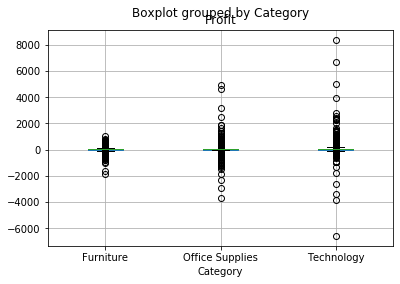

In [28]:
df.boxplot(column='Profit',by='Category')

In [29]:
ct=df.groupby(by='Category')
ct_1=ct.get_group('Office Supplies')
ct_2=ct.get_group('Furniture')
ct_3=ct.get_group('Technology')


In [30]:
f_oneway(ct_1['Profit'],ct_2['Profit'],ct_3['Profit'])

F_onewayResult(statistic=54.31102304381536, pvalue=3.46991834622419e-24)

here p_value < 0.05, we reject null hypothesis

In [31]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

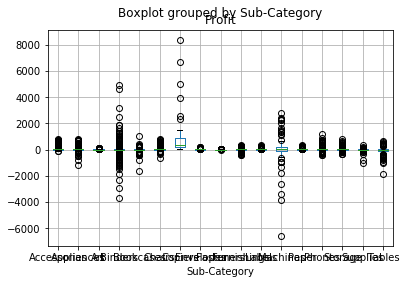

In [32]:
df.boxplot(column='Profit',by='Sub-Category')

In [33]:
levene(df['Sales'],df['Profit'])

LeveneResult(statistic=538.7762910430544, pvalue=1.2490520721496462e-117)

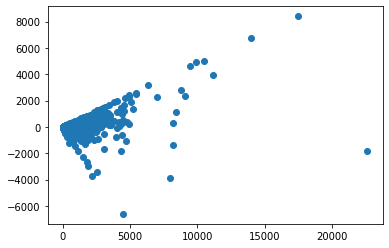

In [34]:
plt.scatter(df['Sales'],df['Profit'])

In [35]:
levene(df['Quantity'],df['Profit'])

LeveneResult(statistic=596.9640102035897, pvalue=6.148729699090128e-130)

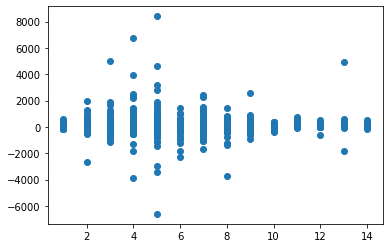

In [36]:
plt.scatter(df['Quantity'],df['Profit'])

In [37]:
levene(df['Discount'],df['Profit'])

LeveneResult(statistic=629.1161810173252, pvalue=1.008775740282987e-136)

here Sales, Quantity and Discount variance are different and p_value is lessthan 0.05, hence we reject null hypothesis

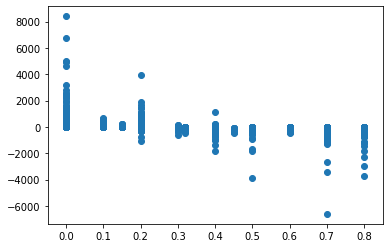

In [38]:
plt.scatter(df['Discount'],df['Profit'])

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

cols = ["State","City",'Region','Category','Sub-Category']

for col in cols:
    df[col] = labelencoder.fit_transform(df[col])

In [40]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,194,15,42420,2,0,4,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,194,15,42420,2,0,5,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,266,3,90036,3,1,10,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,153,8,33311,2,0,16,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,153,8,33311,2,1,14,22.3680,2,0.20,2.5164


In [41]:
df=df.drop(['Ship Mode','Segment','Country'],axis=1)
df

,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,194,15,42420,2,0,4,261.9600,2,0.00,41.9136
1,194,15,42420,2,0,5,731.9400,3,0.00,219.5820
2,266,3,90036,3,1,10,14.6200,2,0.00,6.8714
3,153,8,33311,2,0,16,957.5775,5,0.45,-383.0310
4,153,8,33311,2,1,14,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,295,8,33180,2,0,9,25.2480,3,0.20,4.1028
9990,104,3,92627,3,0,9,91.9600,2,0.00,15.6332
9991,104,3,92627,3,2,13,258.5760,2,0.20,19.3932
9992,104,3,92627,3,1,12,29.6000,4,0.00,13.3200


In [42]:
df.corr()

,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
City,1.000000,0.009805,0.093806,0.282255,0.013736,-0.005966,0.005592,-0.000929,-0.151914,0.024217
State,0.009805,1.000000,-0.285250,-0.444400,0.006285,-0.002061,0.004015,-0.000836,0.162552,-0.025315
Postal Code,0.093806,-0.285250,1.000000,0.474774,-0.002331,-0.003788,-0.023854,0.012761,0.058443,-0.029961
Region,0.282255,-0.444400,0.474774,1.000000,-0.005148,0.009112,0.004216,0.013506,-0.212769,0.022216
Category,0.013736,0.006285,-0.002331,-0.005148,1.000000,-0.075655,0.040077,-0.003619,-0.062897,0.091506
Sub-Category,-0.005966,-0.002061,-0.003788,0.009112,-0.075655,1.000000,0.059843,-0.017265,-0.153455,-0.029503
Sales,0.005592,0.004015,-0.023854,0.004216,0.040077,0.059843,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.000929,-0.000836,0.012761,0.013506,-0.003619,-0.017265,0.200795,1.000000,0.008623,0.066253
Discount,-0.151914,0.162552,0.058443,-0.212769,-0.062897,-0.153455,-0.028190,0.008623,1.000000,-0.219487
Profit,0.024217,-0.025315,-0.029961,0.022216,0.091506,-0.029503,0.479064,0.066253,-0.219487,1.000000


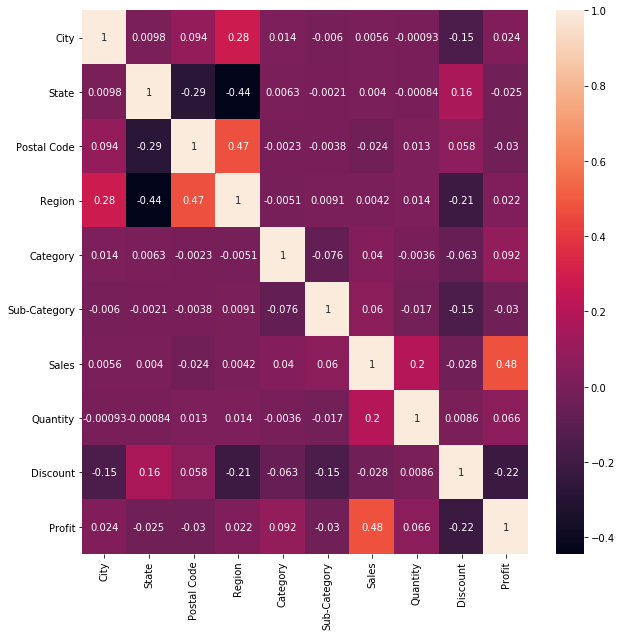

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

correlation between independent variables and dependent variable

# **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [47]:
X=df.drop(['Profit'],axis=1)
Y=df['Profit']

In [48]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [49]:
Xc=sm.add_constant(X)
model=sm.OLS(Y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     441.0
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:26:02   Log-Likelihood:                -67039.
No. Observations:                9994   AIC:                         1.341e+05
Df Residuals:                    9984   BIC:                         1.342e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           60.5390      9.157      6.612      0.000      42.590      78.488
City            -0.0106      0.015     -0.698      0.485      -0.040       0.019
State           -0.0278      0.146     -0.190      0.849      -0.314       0.259
Postal Code    6.28e-05    7.2e-05      0.872      0.383   -7.84e-05       0.000
Region          -5.8444      2.228     -2.623      0.009     -10.212      -1.477
Category        19.0697      3.173      6.010      0.000      12.850      25.289
Sub-Category    -4.1289      0.400    -10.319      0.000      -4.913      -3.345
Sales            0.1813      0.003     55.612      0.000       0.175       0.188
Quantity        -3.1329      0.911     -3.441      0.001      -4.918      -1.348
Discount      -253.4899     10.274    -24.672      0.000    -273.630    -233.350
==============================================================================
Omnibus:                    15263.610   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         80213293.459
Skew:                          -8.589   Prob(JB):                         0.00
Kurtosis:                     441.557   Cond. No.                     3.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from above p_value we are selecting the features.

In [50]:
X=df.drop(['Profit','City','State','Postal Code'],axis=1)
y=df['Profit']

In [51]:
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     661.4
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:26:55   Log-Likelihood:                -67040.
No. Observations:                9994   AIC:                         1.341e+05
Df Residuals:                    9987   BIC:                         1.341e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.8094      7.113      8.267      0.000      44.866      72.753
Region          -5.1314      1.747     -2.937      0.003      -8.556      -1.707
Category        19.0905      3.172      6.018      0.000      12.873      25.308
Sub-Category    -4.1151      0.400    -10.293      0.000      -4.899      -3.331
Sales            0.1812      0.003     55.610      0.000       0.175       0.188
Quantity        -3.1216      0.910     -3.429      0.001      -4.906      -1.337
Discount      -251.2756      9.983    -25.169      0.000    -270.845    -231.706
==============================================================================
Omnibus:                    15261.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         80265637.537
Skew:                          -8.586   Prob(JB):                         0.00
Kurtosis:                     441.701   Cond. No.                     3.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [61]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
regressor.intercept_ 

54.208394888698024

In [65]:
regressor.coef_ 

array([-3.92079034e+00,  1.86726934e+01, -3.70868614e+00,  1.54874724e-01,
       -2.12890879e+00, -2.42582109e+02])

only category feature is effecting positively on profit and other features are effecting negatively

In [53]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [54]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

      Region  Category  Sub-Category    Sales  Quantity  Discount
7933       3         1             7   23.360         2       0.0
8657       3         1             1   22.660         2       0.0
9599       3         1             1   35.208         1       0.2
799        3         0             5  283.920         5       0.2
3813       0         1            10   19.824         6       0.2
...      ...       ...           ...      ...       ...       ...
2890       2         0             5   51.960         2       0.0
4890       3         1             2    8.820         3       0.0
2738       1         2            13   89.980         2       0.0
5981       0         1            14   19.860         2       0.0
6087       3         0             9   29.220         3       0.0

[1999 rows x 6 columns]


In [55]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
7933,11.6800,34.517970
8657,9.7438,56.661675
9599,2.6406,12.217530
799,17.7450,8.713659
3813,6.4428,-22.425411
...,...,...
2890,12.9900,31.612857
4890,2.5578,48.680614
2738,43.1904,49.097882
5981,5.7594,19.777477


In [56]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 62.15859891005302
